In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Data curation using pandas

## a. 

In [40]:
dfcrossmatches_small = pd.read_pickle("dfcrossmatches_small.pickle")

In [57]:
dfcrossmatches_small.head()

,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec
oid,,,,,,,,
ZTF18aaveffj,LPV,291.520423,21.930962,NaN,GAIADR2VS,2018953972876187648.0,MIRA_SR,0.067312
ZTF19aauyvnv,LPV,270.298238,-17.722810,NaN,GAIADR2VS,4143774487177066496.0,MIRA_SR,0.062104
ZTF18ablqvvc,RRL,271.180157,-6.556286,NaN,GAIADR2VS,4171403011041441792.0,RRAB,0.095138
ZTF19abiblfd,RRL,268.188213,-17.161156,NaN,GAIADR2VS,4144758786310249984.0,RRAB,0.043913
ZTF18acbvvku,AGN,48.110790,39.274936,NaN,MILLIQUAS,4C 39.11,A,0.055433


In [41]:
# Viewing the columns names
for col in dfcrossmatches_small.columns:
    print(col)

classALeRCE
ra
dec
period
source
id_source
class_source
separation_arcsec


In [42]:
classes = dfcrossmatches_small['classALeRCE']

In [24]:
classes = classes[:]

In [25]:
classes

oid
ZTF18aaveffj      LPV
ZTF19aauyvnv      LPV
ZTF18ablqvvc      RRL
ZTF19abiblfd      RRL
ZTF18acbvvku      AGN
                ...  
ZTF18aawgtde      QSO
ZTF18ablqnie      LPV
ZTF19adcftsl      QSO
ZTF17aaaeblo      LPV
ZTF17aaawcpz    EB/EW
Name: classALeRCE, Length: 50000, dtype: object

Text(0, 0.5, 'Frequency')

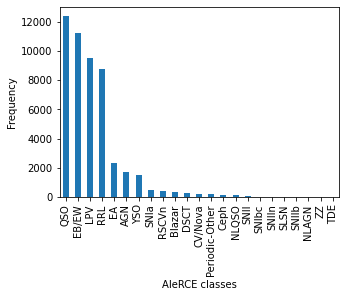

In [34]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax = classes.value_counts().plot.bar()
ax.set_xlabel('AleRCE classes')
ax.set_ylabel('Frequency')

## b.

In [3]:
# Importing the data from .pickle to DF
features_small = pd.read_pickle('features_small.pickle')

In [45]:
# Printing a part of the DF
features_small

,name,value,fid,version
oid,,,,
ZTF17aaaabrg,Amplitude,0.242504,1,feature_0.0.1
ZTF17aaaabrg,Amplitude,0.232499,2,feature_0.0.1
ZTF17aaaabrg,AndersonDarling,1.000000,1,feature_0.0.1
ZTF17aaaabrg,AndersonDarling,1.000000,2,feature_0.0.1
ZTF17aaaabrg,Autocor_length,1.000000,1,feature_0.0.1
...,...,...,...,...
ZTF21abkylyc,Std,0.239856,2,feature_0.0.1
ZTF21abkylyc,StetsonK,NaN,1,feature_0.0.1
ZTF21abkylyc,StetsonK,0.886870,2,feature_0.0.1


In [6]:
# Pivoting columns and values
features_small_pivoted = features_small.pivot(values='value', columns=['name', 'fid'])

In [7]:
features_small_pivoted.head()

name         Amplitude           AndersonDarling           Autocor_length  \
fid                 1         2               1         2              1    
oid                                                                         
ZTF17aaaabrg  0.242504  0.232499             1.0  1.000000            1.0   
ZTF17aaaabtj  0.294114  0.216206             1.0  1.000000            1.0   
ZTF17aaaacml  0.179008  0.162632             1.0  1.000000            1.0   
ZTF17aaaacnc  0.199403  0.215955             1.0  0.999978            1.0   
ZTF17aaaacnt  0.671062  0.498549             1.0  0.775576            1.0   

name              Beyond1Std            Con            ...       Std  \
fid            2          1         2    1         2   ...        2    
oid                                                    ...             
ZTF17aaaabrg  1.0   0.426471  0.361446  0.0  0.000000  ...  0.164944   
ZTF17aaaabtj  1.0   0.489510  0.390909  0.0  0.009259  ...  0.119271   
ZTF17aaaacml  1.0   0.403846  0.229508  0.0  0.000000  ...  0.115176   
ZTF17aaaacnc  1.0   0.062500  0.350000  0.0  0.000000  ...  0.102518   
ZTF17aaaacnt  1.0   0.242105  0.298246  0.0  0.000000  ...  0.271919   

name          StetsonK           g-W2 g-W3 Power_rate r-W2 r-W3 W1-W2 W2-W3  
fid                 1         2    0    0          12   0    0     0     0   
oid                                                                          
ZTF17aaaabrg  0.912734  0.958511  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaabtj  0.967987  0.758365  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaacml  0.946447  0.786144  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaacnc  0.525565  0.786877  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaacnt  0.820105  0.772239  NaN  NaN        NaN  NaN  NaN   NaN   NaN  

[5 rows x 179 columns]

In [16]:
# We select a certain value with DF.iloc[row, column]
features_small_pivoted.iloc[0, 0]

0.24250411987304688

## c.

In [19]:
# Computing the median of each column
columns_median = features_small_pivoted.median(axis=0)

In [25]:
# Filling the NaNs value of the DF with the median value of each column
features_small_pivoted.fillna(value=columns_median)

name         Amplitude           AndersonDarling           Autocor_length  \
fid                 1         2               1         2              1    
oid                                                                         
ZTF17aaaabrg  0.242504  0.232499        1.000000  1.000000            1.0   
ZTF17aaaabtj  0.294114  0.216206        1.000000  1.000000            1.0   
ZTF17aaaacml  0.179008  0.162632        1.000000  1.000000            1.0   
ZTF17aaaacnc  0.199403  0.215955        1.000000  0.999978            1.0   
ZTF17aaaacnt  0.671062  0.498549        1.000000  0.775576            1.0   
...                ...       ...             ...       ...            ...   
ZTF21abkjyui  0.683250  0.341036        0.677959  0.999747            1.0   
ZTF21abkndcw  0.617332  0.341036        0.989514  0.999747            1.0   
ZTF21abknlix  0.077879  0.075038        0.520365  0.386736            3.0   
ZTF21abkrimu  0.402083  0.402185        0.999934  1.000000            1.0   
ZTF21abkylyc  0.402083  0.369650        0.999934  0.576287            1.0   

name              Beyond1Std            Con            ...       Std  \
fid            2          1         2    1         2   ...        2    
oid                                                    ...             
ZTF17aaaabrg  1.0   0.426471  0.361446  0.0  0.000000  ...  0.164944   
ZTF17aaaabtj  1.0   0.489510  0.390909  0.0  0.009259  ...  0.119271   
ZTF17aaaacml  1.0   0.403846  0.229508  0.0  0.000000  ...  0.115176   
ZTF17aaaacnc  1.0   0.062500  0.350000  0.0  0.000000  ...  0.102518   
ZTF17aaaacnt  1.0   0.242105  0.298246  0.0  0.000000  ...  0.271919   
...           ...        ...       ...  ...       ...  ...       ...   
ZTF21abkjyui  1.0   0.333333  0.325000  0.0  0.000000  ...  0.212839   
ZTF21abkndcw  1.0   0.166667  0.325000  0.0  0.000000  ...  0.212839   
ZTF21abknlix  1.0   0.416667  0.285714  0.0  0.000000  ...  0.048887   
ZTF21abkrimu  1.0   0.329268  0.322581  0.0  0.000000  ...  0.268336   
ZTF21abkylyc  1.0   0.329268  0.250000  0.0  0.000000  ...  0.239856   

name          StetsonK                g-W2      g-W3 Power_rate      r-W2  \
fid                 1         2         0         0          12        0    
oid                                                                         
ZTF17aaaabrg  0.912734  0.958511  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaabtj  0.967987  0.758365  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaacml  0.946447  0.786144  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaacnc  0.525565  0.786877  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaacnt  0.820105  0.772239  4.943869  7.820271   0.029785  4.645677   
...                ...       ...       ...       ...        ...       ...   
ZTF21abkjyui  0.808906  0.825233  4.943869  7.820271   0.000866  4.645677   
ZTF21abkndcw  0.777093  0.825233  2.248809  4.216808   0.000090  1.479431   
ZTF21abknlix  0.839430  0.776154  8.182998  8.388997   0.053091  5.690223   
ZTF21abkrimu  0.834742  0.850610  4.943869  7.820271   0.002877  4.645677   
ZTF21abkylyc  0.834742  0.886870  4.943869  7.820271   0.184779  4.645677   

name              r-W3     W1-W2     W2-W3  
fid                 0         0         0   
oid                                         
ZTF17aaaabrg  7.501856  0.559000  2.527000  
ZTF17aaaabtj  7.501856  0.559000  2.527000  
ZTF17aaaacml  7.501856  0.559000  2.527000  
ZTF17aaaacnc  7.501856  0.559000  2.527000  
ZTF17aaaacnt  7.501856  0.559000  2.527000  
...                ...       ...       ...  
ZTF21abkjyui  7.501856  0.559000  2.527000  
ZTF21abkndcw  3.447430 -0.316000  1.967999  
ZTF21abknlix  5.896222  0.051001  0.205999  
ZTF21abkrimu  7.501856  0.559000  2.527000  
ZTF21abkylyc  7.501856  0.559000  2.527000  

[39024 rows x 179 columns]